# A $1 Million Dollar Question You Can Solve With Data Science Today!

In [1]:
# from IPython import display 
# display.Image("https://www.onthemarket.com/content/wp-content/uploads/2016/01/2016-House-prices-lead.gif", width=600)

This is a Python Jupyter Notebook to demostrate an end-to-end process for a specific Data-Science problem on a specific dataset.

Before anything, let's import a bunch of pythoin libraries that we are going to use later in this notebook. You can always import more libraries here as needed!

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

# 🟥 Phase A: What Happened and Why? (EDA)
In this first phase your main goal is loading up the data into a Pandas dataframe and looking into it to understand your data, clean your data, and finally explore your data by performing some simple statistical analysis to discover patterns and ways to go in the next phase!

## 1️⃣ Step 1: Collecting Data
In this step we load the data into a panda data frame. Depending on the format of source data there are many ways to import data into a pandas dataframe. `read_csv` is one of the most popular ones to load data from flat files in csv format.

let's use `read_csv` function from pandas library (we renamed `Pandas` as `pd` for simplicity above, remember!) to load our source data file into a data-frame that we choose to call it `df`


In [34]:
# comment: loading data into a dataframe
df = pd.read_csv('./us_housing_price.csv')

## 2️⃣ Step 2: Undestanding Data
In this step our objective is have an understanding of our data by looking at the generic characteristics of this dataframe such as: `number of rows`, `number of columns`, `list of column names`, `type of data values in each column`, `the distribution of values in the columns`, etc.

In [35]:
# let's take a look at the header of our new built dataframe
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [36]:
# dataframe dimensions: number of rows & number of columns
df.shape

(5000, 7)

In [37]:
# list of column names
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [38]:
# data types of the values in the columns. For example the data type of the vale stores in the first row of the "price" and "Address" columns
type(df['Price'][0]), type(df['Address'][0])

(numpy.float64, str)

In [39]:
# well, fortunatelly `pandas` has some functions that provide an overview of the dataframe. Let's use a couple of them to understand the data better!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4750 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [40]:
#here is another useful panda function to understand data:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,4750.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987093,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.008317,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.294963,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002775,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.670101,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


C:\Users\Ahsan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

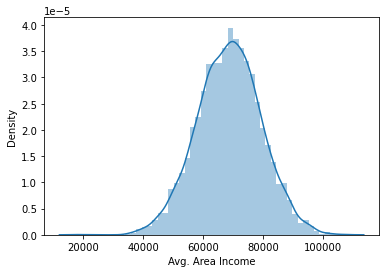

In [41]:
# if you are interested to go a bit deeper and understand more details about value distribution in each column, an easy way is 
# using visualization functions in the library `seaborn` (we called it `sns` above). Below is just one example, seaborn can do much more!
sns.distplot(df['Avg. Area Income'])

## 3️⃣ Step 3: Cleaning Data
Cleaning data is based on our understanding of data in the previous step. It could be multiple issues in data that needs to be cleaned such as `missing values`, `bad data`, `outliers`, etc. But here we keep it simple and focuse on one: `missing values`.

As you may have noticed from the outcome of our experiments in the previous step, there are some missing values in the data. 

In fact, the value of columns `Avg. Area Number of Rooms` is missing in 250 cases! We can address this issue multiple ways, depending on the situation. Below is two of the most popular approaches: (1) removing the rows with missing data and not worrying about them! , (2) replacing the missing values with the mean value of the existing values and hope for the best!

In [42]:
# approach #1: removing all rows with missing values
df_cleaned1 = df.dropna()

In [43]:
# let's take another look into our data AFTER cleaning
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4750 non-null   float64
 1   Avg. Area House Age           4750 non-null   float64
 2   Avg. Area Number of Rooms     4750 non-null   float64
 3   Avg. Area Number of Bedrooms  4750 non-null   float64
 4   Area Population               4750 non-null   float64
 5   Price                         4750 non-null   float64
 6   Address                       4750 non-null   object 
dtypes: float64(6), object(1)
memory usage: 296.9+ KB


In [44]:
# approach #1: replacing the missing values with the mean value of the existing values
meanValue = np.mean(df['Avg. Area Number of Rooms']) # computing the meanValue
df_cleaned2 = df

df_cleaned2['Avg. Area Number of Rooms'] = df_cleaned2['Avg. Area Number of Rooms'].fillna(meanValue) # replacing NULLs witm the computed meanValue

In [45]:
# let's take another look into our data AFTER cleaning
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## 4️⃣ Step 4: Statistical Analysis
We had to do all the previous steps in this phase to be able to do this step and addressing the question of this phase: What Happened? Why?

This can be like opening a can of worms though! 🥫🐛🐛🐛 There are countless experiments you can do as needed here. It all goes back to the questions you ask!

Below is only a few questions/examples of the most popular statistical analysis that can be done. But keep in mind that you have no limit to do more! We are fortunate enough to live in a time that a lot of statistical analysis functions has been built in to the python libraries like pandas and seaborn and all you need to do is learn how to use them! Piece's cake! 🍰

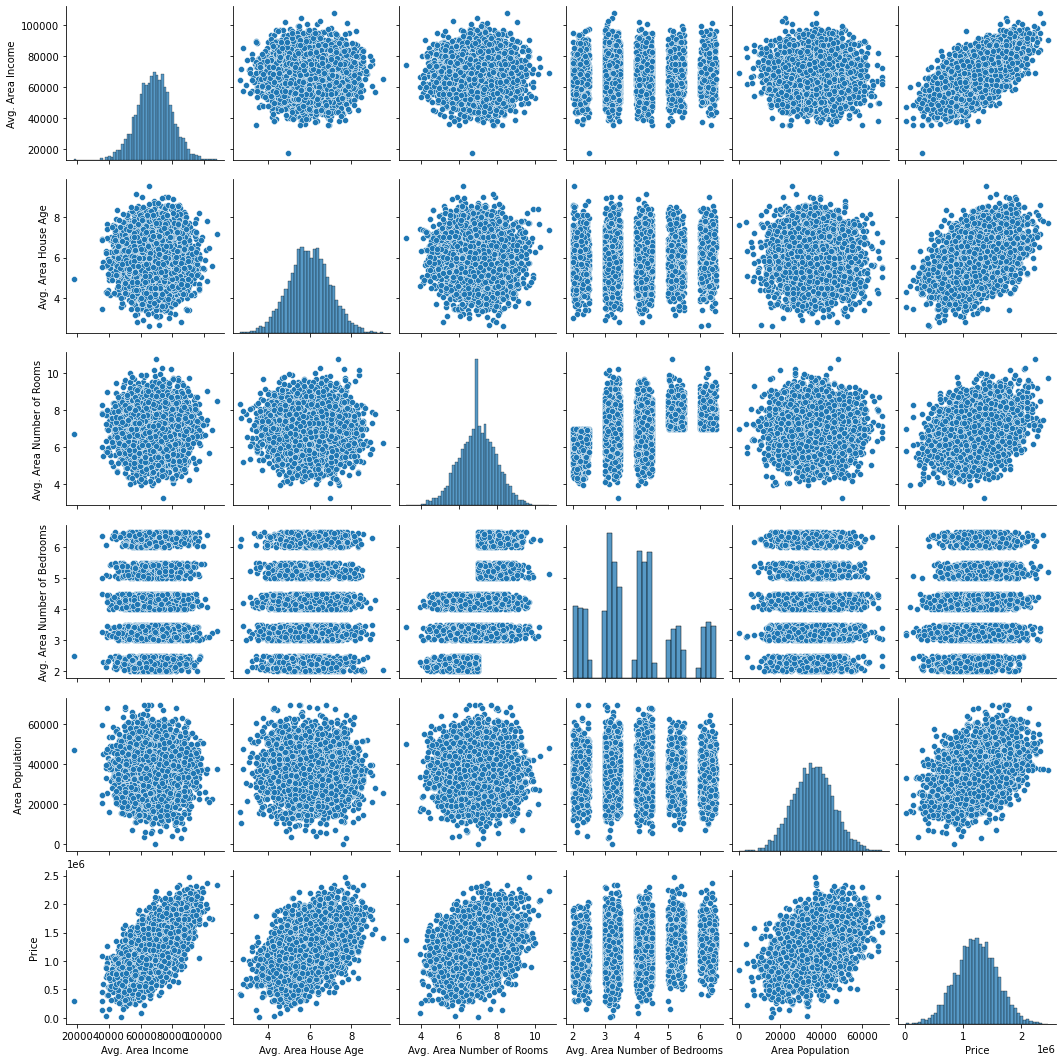

In [46]:
# Question: How is the correlation between each pairs of columns?
sns.pairplot(df_cleaned2)

In [47]:
# Question: What is the average values in a column? What about minimum and maximum?
display( 
    df_cleaned2['Price'].mean(), 
    df_cleaned2['Price'].min(), 
    df_cleaned2['Price'].max())

1232072.65414236

15938.657923287848

2469065.5941747027

In [48]:
# Question: How many of records have priced equal or greater than One Million Dollars?
df_cleaned2['is_1mplus'] = (df_cleaned2['Price'] >= 1000000) # creating a new column to store that information for each row to be used later
df_cleaned2['is_1mplus'].value_counts() #count by values

True     3737
False    1263
Name: is_1mplus, dtype: int64

In [49]:
# Question: What is the average values of features when we group by the price-class (above-1M, and below-1M)
df_cleaned2.groupby(['is_1mplus']).mean()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
is_1mplus,,,,,,
False,59947.369130,5.407102,6.573636,3.697466,30979.565706,7.847573e+05
True,71501.744102,6.169906,7.126830,4.077268,37915.544208,1.383253e+06


In [50]:
# Question: How many of records have "Avg. Area Number of Bedrooms" equal or greater than 5?
df_cleaned2['is_5bdplus'] = (df_cleaned2['Avg. Area Number of Bedrooms'] >= 5) # creating a new column to store that information for each row to be used later
df_cleaned2['is_5bdplus'].value_counts() #count by values

False    3786
True     1214
Name: is_5bdplus, dtype: int64

In [51]:
# Question: How many of the houses priced above 1 Million Dollars have 5 or more bedrooms?
pd.crosstab(df_cleaned2['is_5bdplus'], df_cleaned2['is_1mplus'])

is_1mplus,False,True
is_5bdplus,,
False,1071,2715
True,192,1022


# 🟥🟥 Phase B: What Will Happen? (AI Models)
The objective in this phase is using Machinea Learning algorithms (through python libraries) to build a predictive model that can get a few inout features such as the number of bedrooms, the number of rooms, income level within the area and tell us if this given house is likly to be priced equal or greater than $1M dollars!

## 5️⃣ Step 5: Predictive Modeling

In [52]:
# let's take a look at all available columns
df_cleaned2.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'is_1mplus', 'is_5bdplus'],
      dtype='object')

In [54]:
# marking input "features" as X and the "target label" as y
feature_names = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms']
X = df_cleaned2[feature_names]
y = df_cleaned2['is_1mplus']

In [57]:
#import the required library
from sklearn.model_selection import train_test_split

# splitting entire data randomly into test (30%) and trainig (70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
#import the required library
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() #define model

model.fit(X_train, y_train) #fit the model to the data (AKA TRAINING)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(X_train, y_train))) #accuracy on training data
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test))) #accuracy on test data

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.87


In [59]:
# define a new input case with all of the requred features
# for simplicity we pick one row from existing data, 
# but it doesn't need to be from existing data! Pass any values, the model will make a prediction!
# required features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']

newInputs = list(df_cleaned2.loc[90,feature_names]) 

Xnew = [newInputs]

# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[48904.98326931684, 4.8449725308343625, 5.448956029609428], Predicted=False


C:\Users\Ahsan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [73]:
# exercise: insert new values of input features and see what's the model's prediction for yourselves!
newInputs = [19000, 9, 20] 

Xnew = [newInputs]

# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted =%s" % (Xnew[0], ynew[0]))

X=[19000, 9, 20], Predicted =True


C:\Users\Ahsan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [74]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)
y_pred.value_counts()

True     1193
False     307
dtype: int64

In [76]:
y_test = y_test.reset_index(drop=True)
y_test.value_counts()

True     1150
False     350
Name: is_1mplus, dtype: int64

# 🟥🟥🟥 Phase C: Are You Sure? (Model Evaluation)
The objective of this phase is evaluating the model and make sure it works! There are various ways and metrics to evaluate and quantify the performance of a model. 

Here in this `Classification` example we focus on a couple of most important metrics: (1) Confusion Metrix and (2) ROC Curve

In other types of problems such as `Regression` and `Unsupervised Learning` there are other metrics that one can use for model evaluation. You will learn more about them in the assignment.

## 6️⃣ Step 6: Evaluation
In `Classifican` type of problems when our goal is to make a class prediction. In many cases that is a binary classification, meaning there are only 2 classes available such as Yes/No,  1/0, True/False, or Positive/Negative etc. Let say two classes of Posive and Negative for simplicity. 

`Confusion Matrix` is a good simeple way to evaluate the performance of the model on unseen data. Confusion-Matrix includes 4 components consist of the count of the following variables:

- **False-Positives**: those which the model predicted as Positive, but they are actually not Positive **(Falsly predicted as Positive)**

- **True-Positives**: those which the model predicted as Positive, and they are actually Positive **(Truly predicted as Positive)**

- **False-Negative**: those which the model predicted as Negative, but they are actually not Negative **(Falsly predicted as Negative)**

- **True-Negative**: those which the model predicted as Negative, and they are actually Negative **(Truly predicted as Negative)**

The `ROC curves` are also made of these 4 above fundamental components. However, unlike in Confusion-Matrix the threshold value of classification is a `moving threshold`. The area under the curve or `AUC` is a good indicator for performance of a classification model. An ideal model (not exist!) would have a AUC value of 1.00. Any model with a AUC of 0.50 or lower is not better than a void classifier purely based on flipping a coin! 

In [29]:
#confusion metrics homemade
pd.crosstab(y_pred, y_test)

is_1mplus,False,True
row_0,,
False,230,77
True,120,1073


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


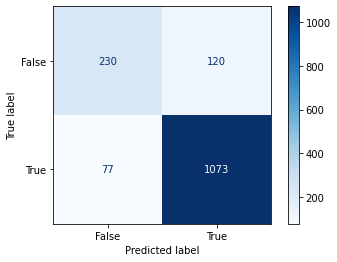

In [30]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap = 'Blues')  
plt.show()  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


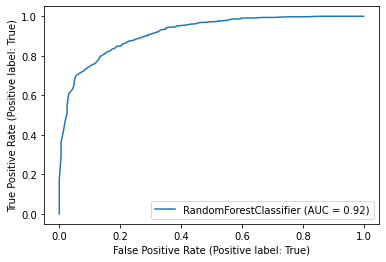

In [31]:
import matplotlib.pyplot as plt  
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)  
plt.show()

## 7️⃣ Step 7: Deployment
We will talk about  this important part in Week 5!!!